In [7]:
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime

In [3]:
df_1 = pd.read_csv('2_location_added/df_with_loc1.csv')

In [8]:
# find all make is Honda
df_honda = df_1[df_1['Make'] == 'Honda']

# remove day in datetime, just keep M Y
date = []
for i in range(df_honda.shape[0]):
    m_y = ' '.join([df_honda.iloc[i][5].split()[0], df_honda.iloc[i][5].split()[-1]])
    date.append(datetime.strptime(m_y, '%b %Y').date())

# replca old date 
df_honda['Date'] = date

# find date before we need
start_date = datetime.strptime('Jan 2002', '%b %Y').date()
end_date = datetime.strptime('Jan 2020', '%b %Y').date()
df_sample = df_honda[df_honda['Date'] >= start_date]
df_sample = df_sample[df_sample['Date'] <= end_date]

# date dict for save # of complains 
date_table = {}
for date in set(df_sample['Date']):
    date_table[date] = 0

# counting and sorting
for i in range(df_sample.shape[0]):
    date_table[df_sample.iloc[i][5]] += 1
    
od = collections.OrderedDict(sorted(date_table.items()))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


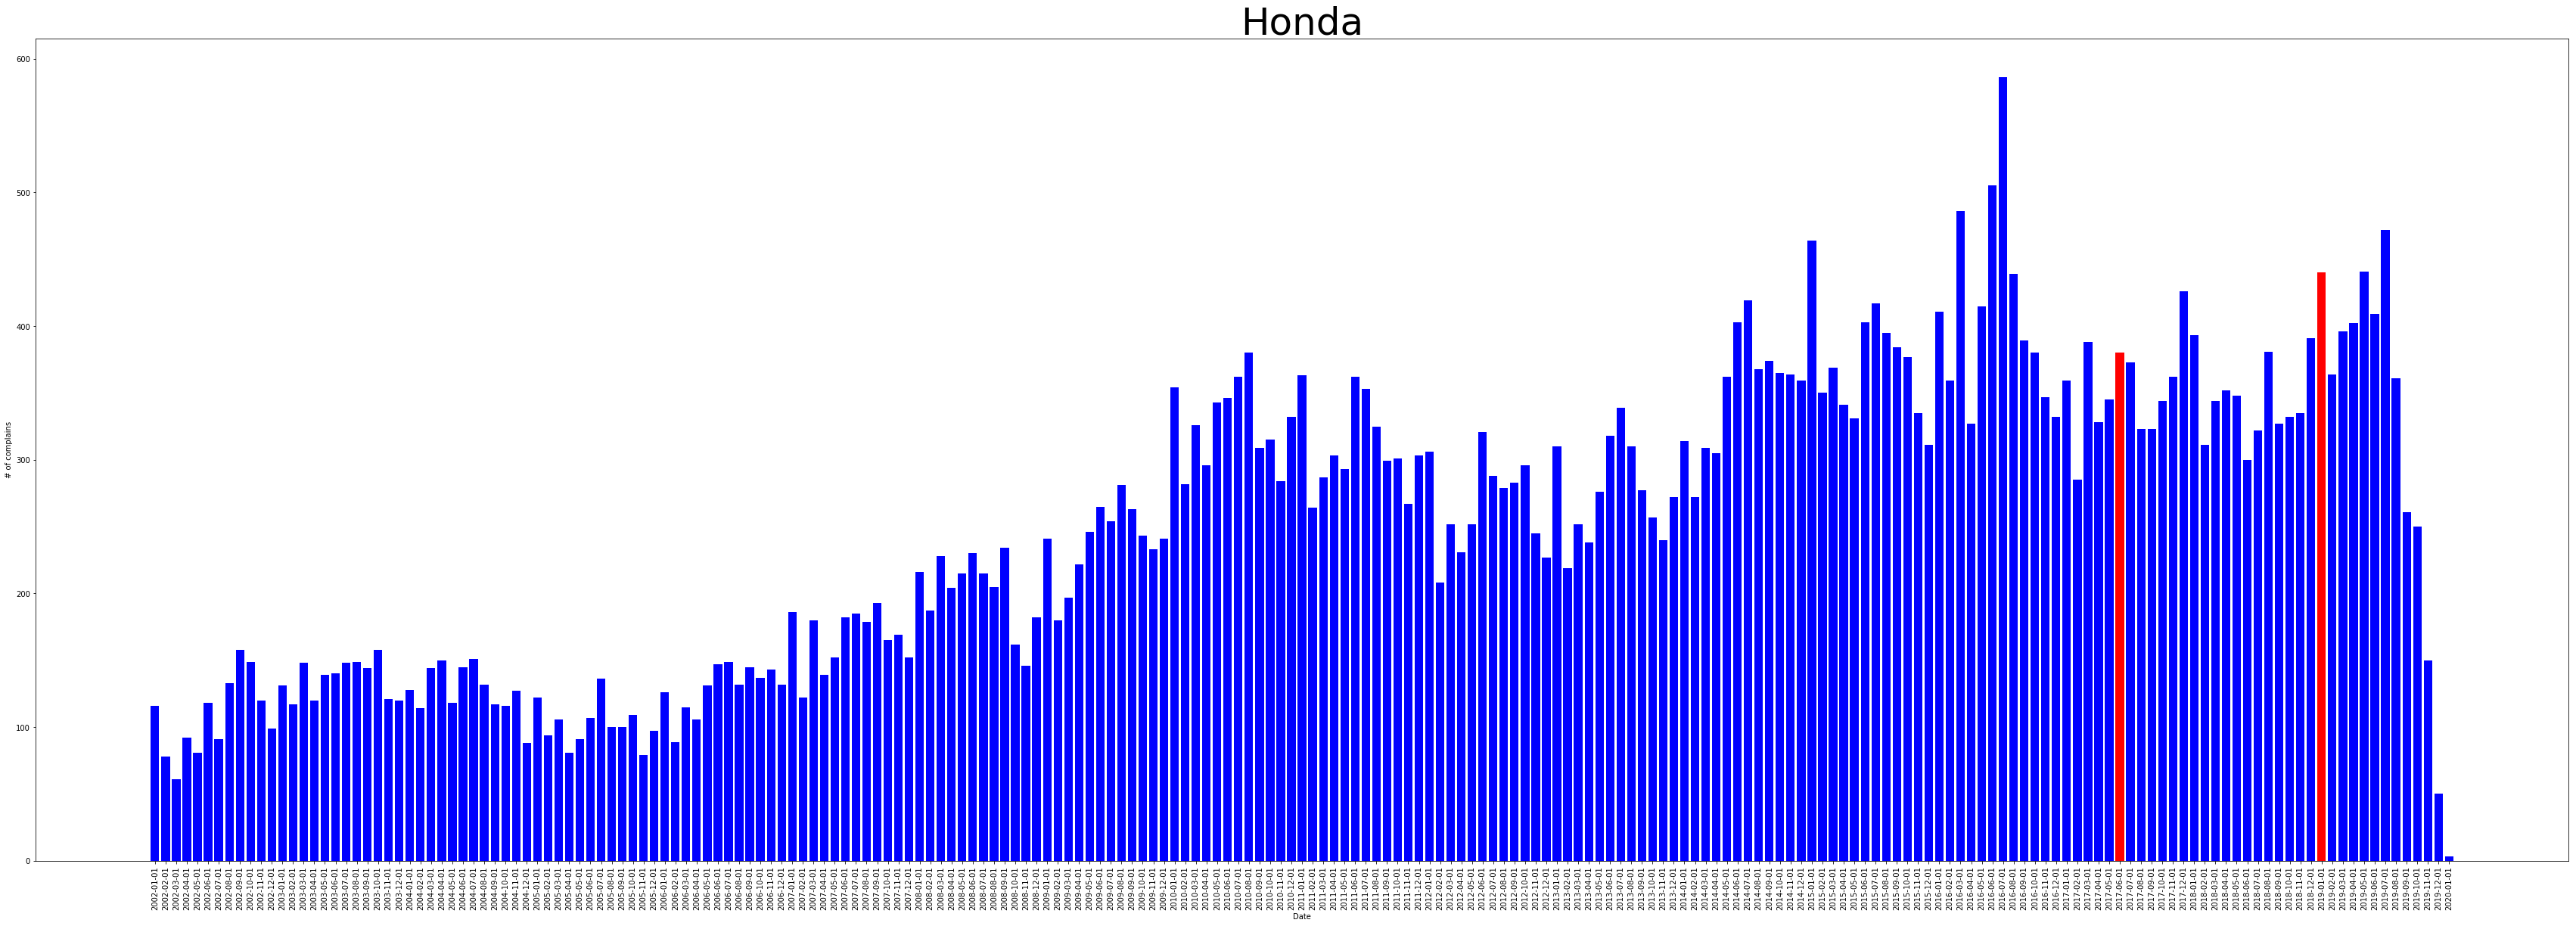

In [9]:
# 2016 Honda Accord recall date
recall_date = ['Jan 2019', 'Jun 2017']
recall_date = [datetime.strptime(date, '%b %Y').date() for date in recall_date]

def plot_dict(dict_):

    
    colors = []
    for key in dict_.keys():
        if key in recall_date:
            colors.append('r')
        else:
            colors.append('b')
            
    plt.figure(figsize=(60, 20))
    plt.title('Honda', fontsize=50)
    plt.bar(x=range(len(dict_)), height=list(dict_.values()), color=colors, tick_label=dict_.values())
#     for i, v in enumerate(list(dict_.values())):
#         ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
    plt.xticks(range(len(dict_)), list(dict_.keys()),rotation='vertical')
    plt.ylabel('# of complains')
    plt.xlabel('Date')
#     plt.savefig('images/Mark of recalls')

plot_dict(od)

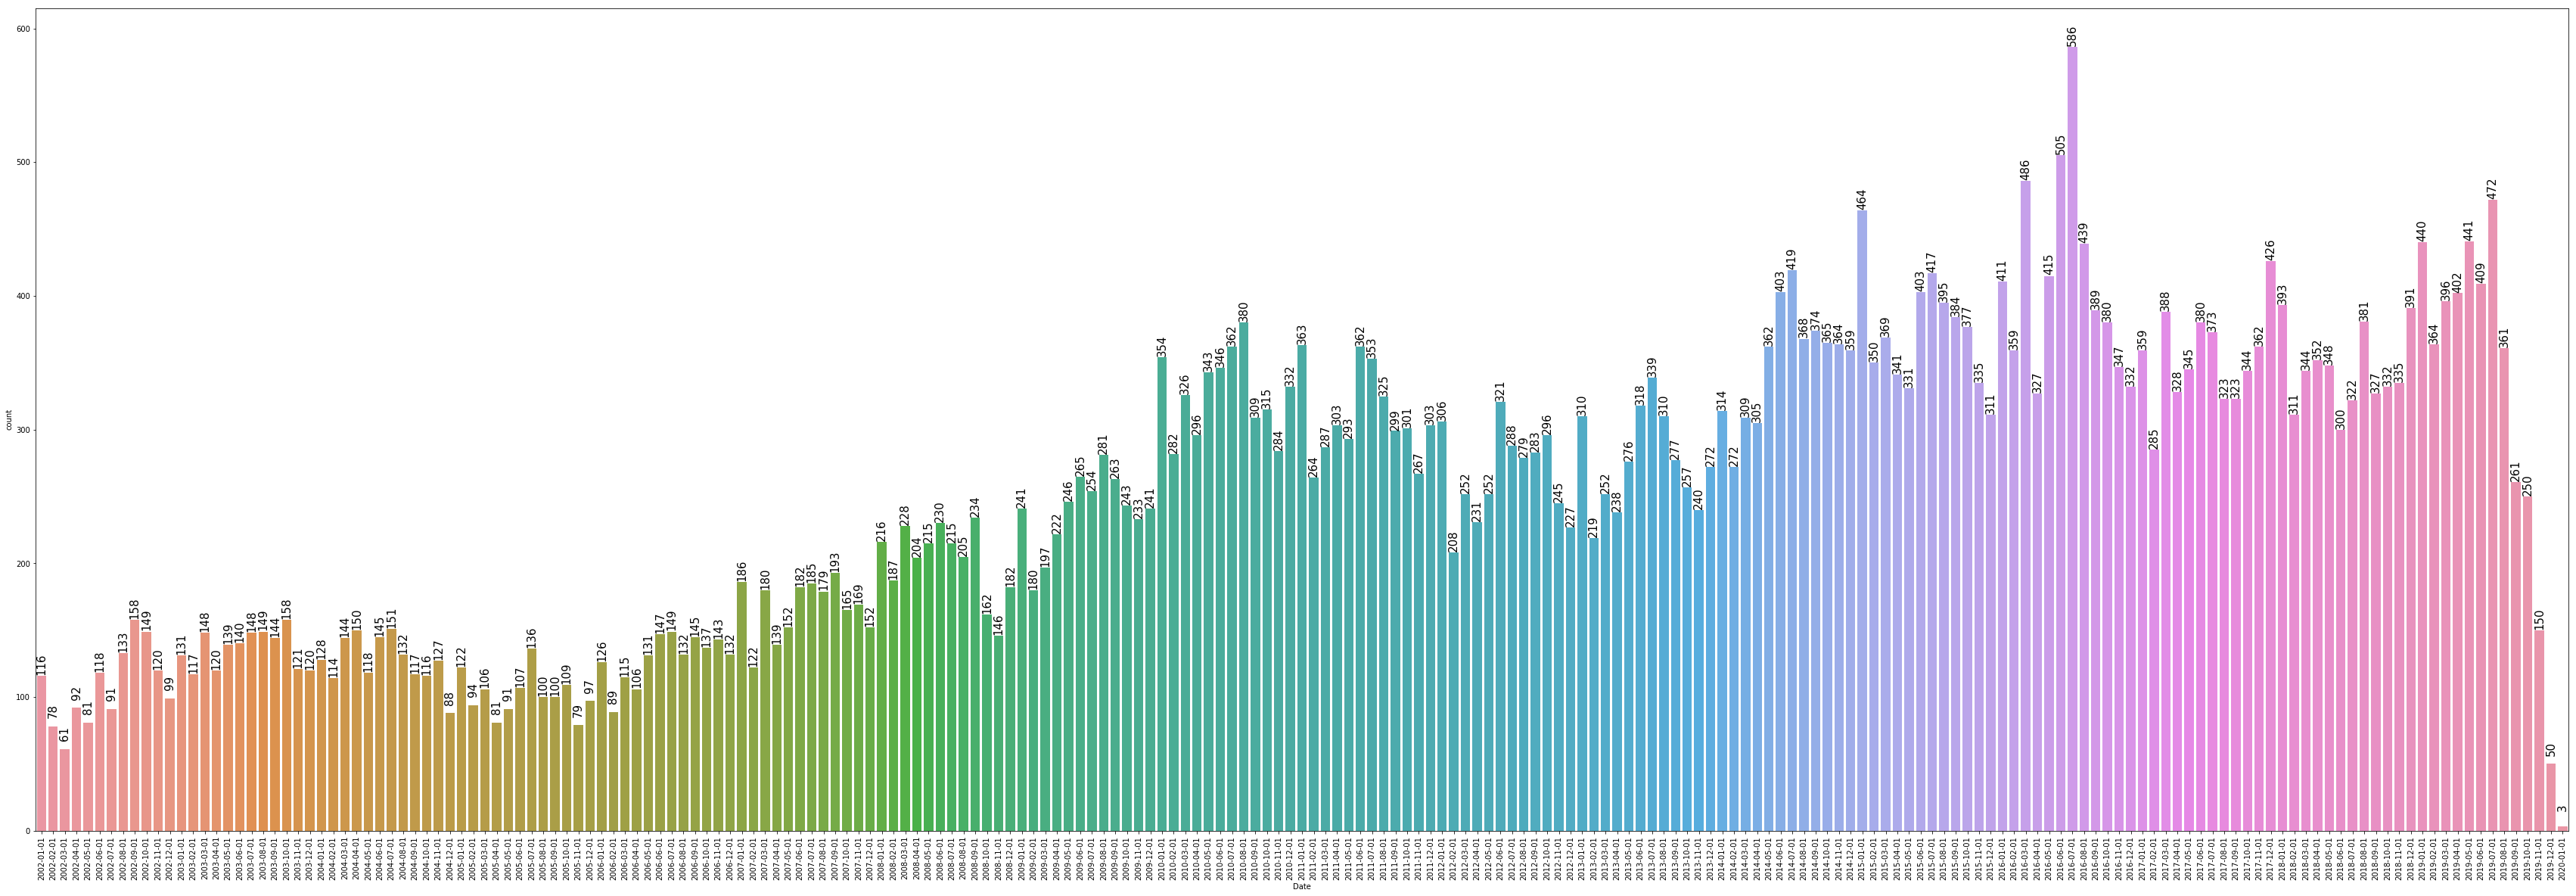

In [10]:
df_sample_sort = df_sample.sort_values('Date')

plt.figure(figsize=(60, 20))
graph = sns.countplot(x='Date', data=df_sample_sort)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 10, height,ha="center", fontsize=15, rotation=90)
    
plt.xticks(rotation=90)
# plt.savefig('images/# of complains')
plt.show()

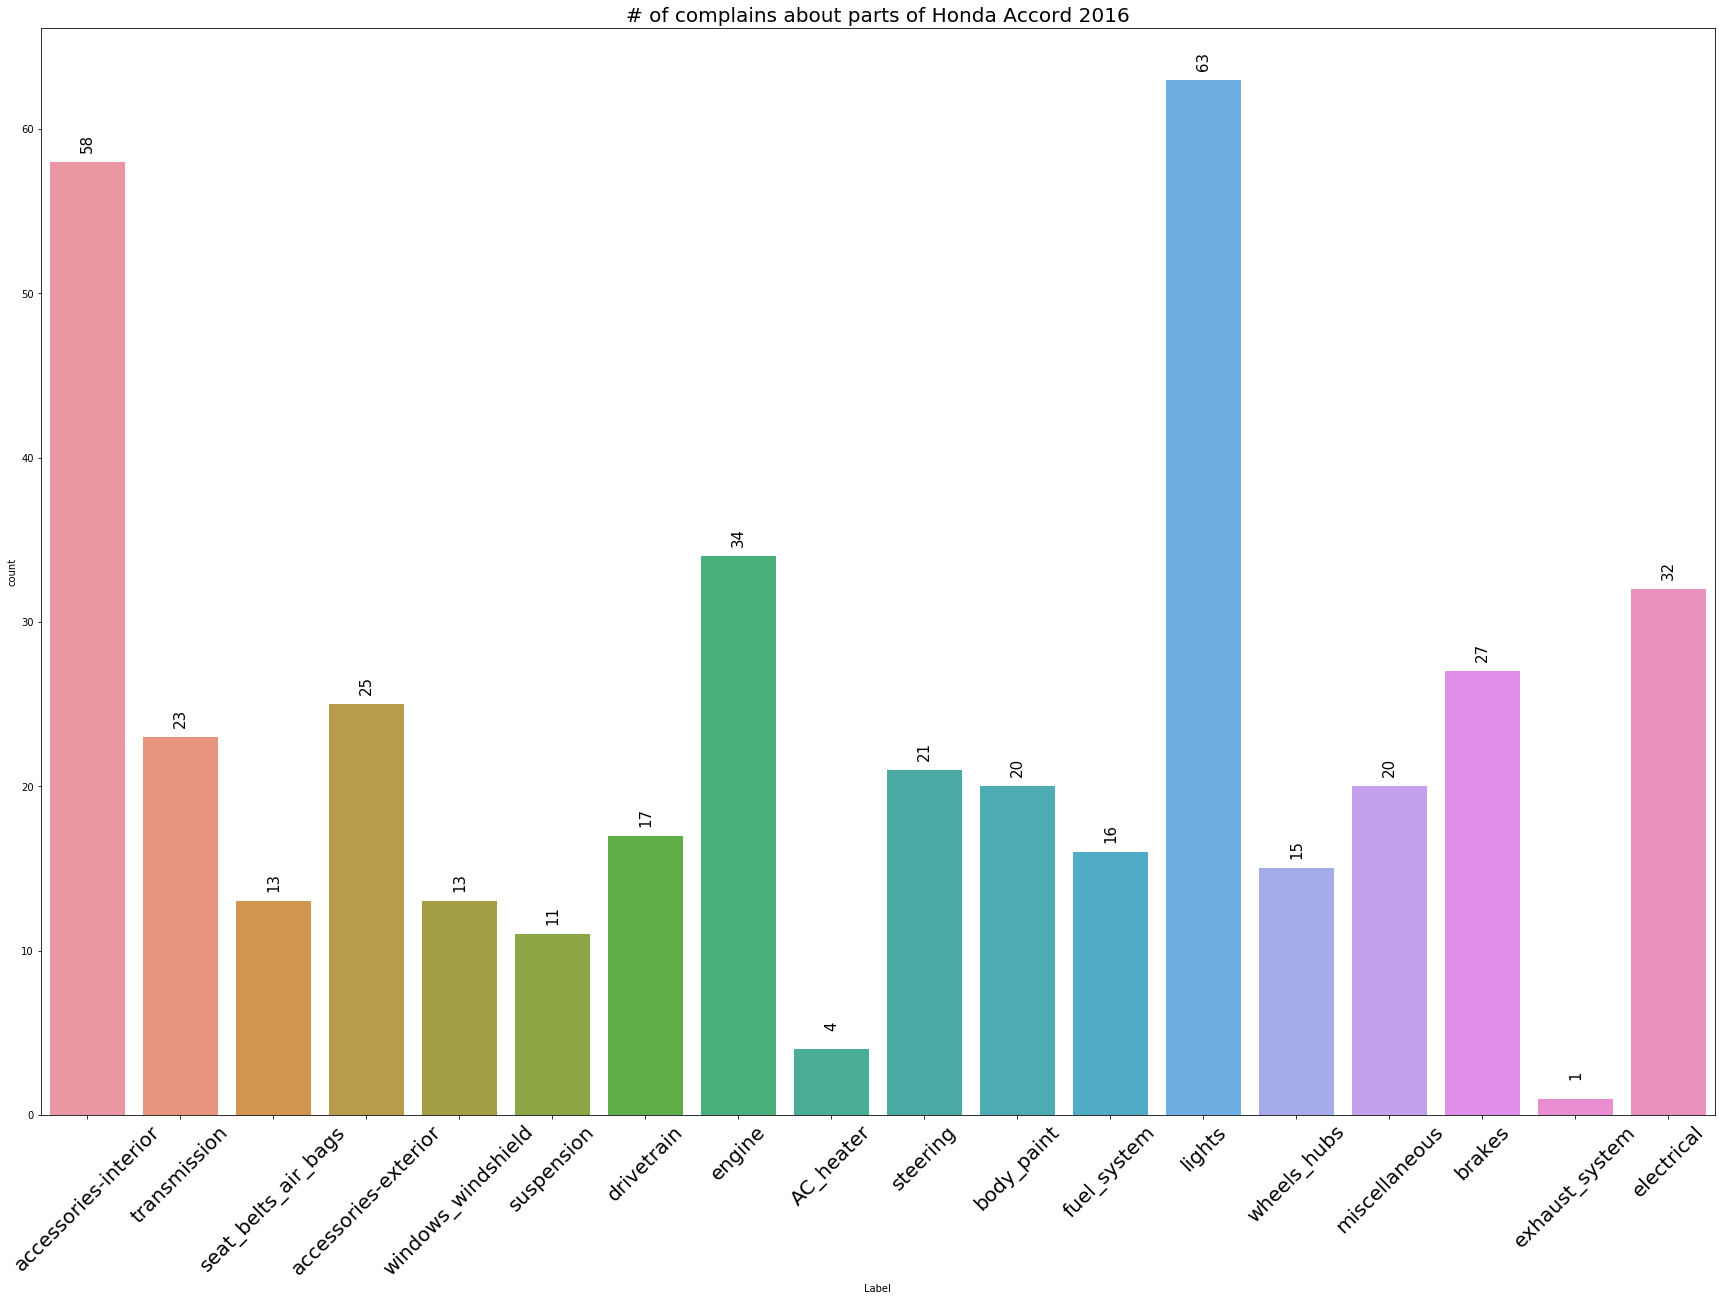

In [11]:
df_honda_accord16 = df_sample_sort[df_sample_sort['Model'] == 'Accord']

df_honda_accord16 = df_honda_accord16[df_honda_accord16['Year'] == 2016]

plt.figure(figsize=(30, 20))
graph = sns.countplot(x='Label', data=df_honda_accord16)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 1, height,ha="center", fontsize=15, rotation=90)
    
plt.title(fontsize=20, label='# of complains about parts of Honda Accord 2016')
plt.xticks(fontsize=20, rotation=45)
# plt.savefig('images/# of complains about parts of Honda Accord 2016')
plt.show()